In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

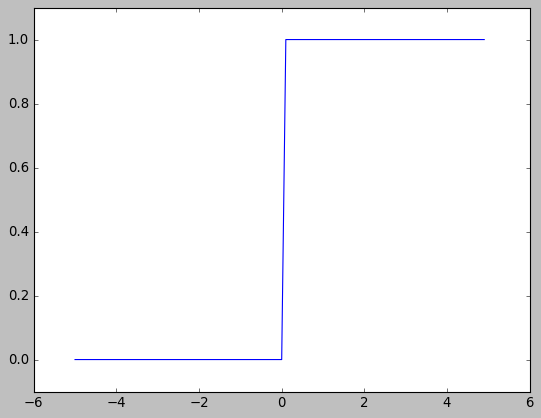

In [25]:
# 계단 함수 구현

def step_function(x) :
    return np.array(x > 0, dtype=int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

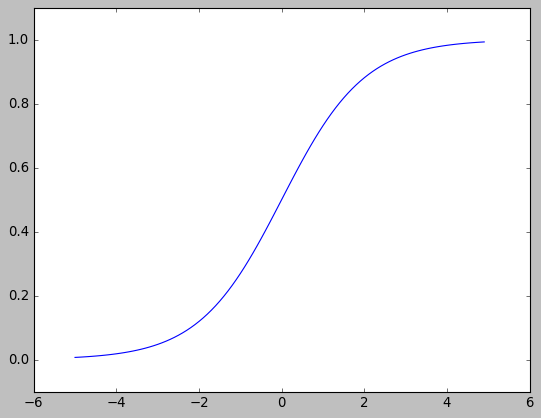

In [26]:
# 시그모이드 함수 구현

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

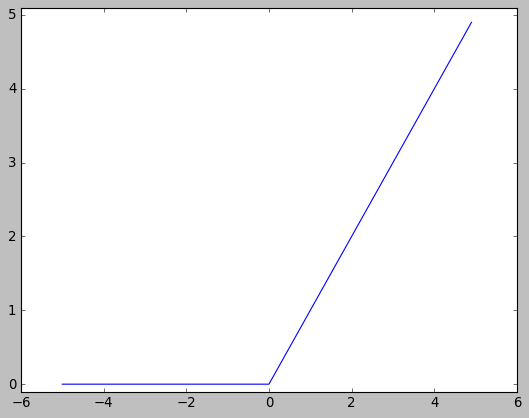

In [27]:
# ReLU 함수 구현
def relu(x) :
    return np.maximum(0,x)

x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1,5.1)
plt.show()


In [28]:
# 간단한 신경망 구현

def init_network() :
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],
                             [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],
                             [0.2,0.5],
                             [0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],
                             [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x) :
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    return a3

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [29]:
# 소프트맥스 함수 구현
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = [0.3, 2.9, 4.0]
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

# MNIST

In [30]:
from locale import normalize
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


5


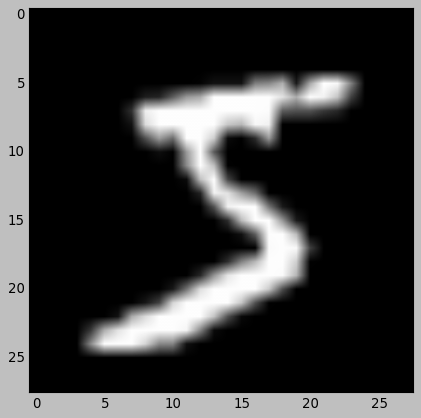

In [31]:
from PIL import Image

def img_show(img) :
    plt.imshow(img, cmap='gray')
    plt.show()
    
img = X_train[0].reshape(28,28)
label = y_train[0]

print(label)
img_show(img)

In [32]:
import pickle

def init_network() :
    with open("sample_weight.pkl", 'rb') as f :
        network = pickle.load(f)
        
    return network

def predict(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [38]:
# 단일 데이터 예측
(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True)
network = init_network()

accuracy_cnt = 0
for i in range(len(X_test)) :
    y = predict(network, X_test[i])
    p = np.argmax(y)
    if p == y_test[i] :
        accuracy_cnt += 1
        
print("Accuracy : ", accuracy_cnt/len(X_test))

Accuracy :  0.9352


In [43]:
# 배치 처리 후 예측 
batch_size = 100

accuracy_cnt = 0

for i in range(0, len(X_test), batch_size) :
    X_batch = X_test[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size])
    
print("Accuracy : ", accuracy_cnt/len(X_test))

Accuracy :  0.9352
